# Kaggle EDA Start


데이터 분석 / 그래프 작성 / 통계 정보 등

> Author: crazyj7@gmail.com

In [65]:
# 경고 무시 (쓸데없는 로그 출력금지)
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# 그래프 관련 
import matplotlib.pyplot as plt
import seaborn as sns



In [66]:
# plot 환경설정 기본값과 달라진 점
class DictDiffer(object):
    """
    Calculate the difference between two dictionaries as:
    (1) items added
    (2) items removed
    (3) keys same in both but changed values
    (4) keys same in both and unchanged values
    """
    def __init__(self, current_dict, past_dict):
        self.current_dict, self.past_dict = current_dict, past_dict
        self.set_current, self.set_past = set(current_dict.keys()), set(past_dict.keys())
        self.intersect = self.set_current.intersection(self.set_past)
    def added(self):
        return self.set_current - self.intersect 
    def removed(self):
        return self.set_past - self.intersect 
    def changed(self):
        return set(o for o in self.intersect if self.past_dict[o] != self.current_dict[o])
    def unchanged(self):
        return set(o for o in self.intersect if self.past_dict[o] == self.current_dict[o])

In [67]:
# make default graph configure
# 그래프 설정값을 디폴트로 리셋해 준다. 
# (가끔 앞의 그래프 설정 변경으로 잘 나오던 그래프가 이상하게 나올때 사용)
def pltconfig_default():
    sns.reset_defaults()
    %matplotlib inline
    
pltconfig_default()

In [68]:
def pltconfig_check():
    d=DictDiffer(plt.rcParams, plt.rcParamsDefault)
    for it in d.changed():
        print(it, plt.rcParamsDefault[it], plt.rcParams[it])
        
pltconfig_check()

interactive False True
figure.facecolor white (1, 1, 1, 0)
figure.dpi 100.0 72.0
figure.figsize [6.4, 4.8] [6.0, 4.0]
figure.subplot.bottom 0.11 0.125
figure.edgecolor white (1, 1, 1, 0)


In [69]:
## load data
inputdir='./'
outputdir='./'

In [70]:
df_train = pd.read_csv(inputdir+'train.csv')
df_test = pd.read_csv(inputdir+'test.csv')

## 데이터 탐색

In [71]:
## data explore
# 데이터의 일부를 관찰. (파라미터가 없으면 디폴트로 5개)
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [72]:
# 데이터의 분포를 간략히 요약. 
# 개수, 평균, 표준편차, 사분위수(최소, 최대) 등.
df_train.describe()
# 개수를 보면 어느 필드에 빠진 데이터들이 있는지 알 수 있음.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# info는 필드들의 정보. 데이터타입. 개수 등
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### NULL (Missing) 데이터 검사

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

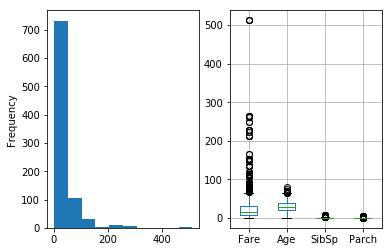

In [12]:
# 데이터 분포도
# 히스토그램으로 구간별 카운팅
# 박스플롯으로 어느 지점에 데이터가 밀집해 있는지 알 수 있다. 
fig, axs = plt.subplots(1,2)
df_train.Fare.plot.hist(ax=axs[0])
df_train.boxplot(['Fare', 'Age', 'SibSp', 'Parch'], ax=axs[1])  # 파라미터 지정이 없으면,  주어진 dataframe의 모든 컬럼별 데이터 분포

In [13]:
# 평균 , 표준편차
print('fare mean=', df_train.Fare.mean(), df_train.Fare.std())
# 표준 편차는 정규분포를 따를때,  평균에서 +- 1 표준편차는 전체의 65% 정도가 해당되고,
# +-2표준편차는 95%, +-3표준편차는 99%정도로 본다. (1.96이 95%, 2.58이 99%)
# 사분위수
print('quantile = ', df_train.Fare.quantile(0), df_train.Fare.quantile(0.25), df_train.Fare.quantile(0.5), df_train.Fare.quantile(0.75), 
                  df_train.Fare.quantile(0.99), df_train.Fare.quantile(1))

fare mean= 32.204207968574636 49.6934285971809
quantile =  0.0 7.9104 14.4542 31.0 249.00622000000033 512.3292


---
## 데이터 수정/병합

In [14]:
# train, test 데이터가 survived를 제외하고 동일함. 합쳐서 전처리 작업을 할 수 도 있다.
# drop은 columns or rows를 삭제할 수 있다. (array로 여러개 지정 가능)
# concat은 병합. axis로 방향.
# iloc는 array index로 filtering
# inplace는 자체 수정 여부. (False이면 자체수정없이 수정된것을 반환.)

# df_all = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0)
# or
df_all = pd.concat([df_train.drop(columns='Survived'), df_test], axis=0)

# passengerid는 의미없으므로 제거.
df_all.drop(columns='PassengerId', inplace=True)

In [15]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# 컬럼 타입별로 구분. 숫자와 숫자 아닌 것. 위에 info()에 마지막에 dtypes 참고.
df_num = df_all.select_dtypes(include=['int64', 'float64'])
df_str = df_all.select_dtypes(include=['object'])

In [17]:
df_num.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
# 스트링 컬럼으로 보면, 클래스 개수(unique참조), 전체 개수 파악(미싱제외)
df_str.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [19]:
# 필드값별로 카운팅
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 스트링 필드를 분할하여 추가 컬럼들을 만들기

In [77]:
lstPath = ['img100_GENUINE.jpg', 'img101_FRAUD.jpg', 'img102_GENUINE.jpg', 'img103_FRAUD.jpg', 'img104_FRAUD.jpg', 'img105_GENUINE.jpg']
dfSample = pd.DataFrame({'path':lstPath})
dfSample

,path
0,img100_GENUINE.jpg
1,img101_FRAUD.jpg
2,img102_GENUINE.jpg
3,img103_FRAUD.jpg
4,img104_FRAUD.jpg
5,img105_GENUINE.jpg


In [99]:
# expand를 True로 하면 n개의 컬럼으로 리턴.
# expand를 False로 하면 1개의 컬럼내에 list로 리턴.
dfSplit = dfSample['path'].str.split('_', expand=False)
print(dfSplit[0][0], dfSplit[0][1])
print(dfSplit[1][0], dfSplit[1][1])

img100 GENUINE.jpg
img101 FRAUD.jpg


In [100]:
dfSplit = dfSample['path'].str.split('_', expand=True)

In [101]:
dfSample['name'] = dfSplit[0]
dfSample['tf'] = dfSplit[1].str.replace('.jpg', '')

In [102]:
dfSample

,path,name,tf
0,img100_GENUINE.jpg,img100,GENUINE
1,img101_FRAUD.jpg,img101,FRAUD
2,img102_GENUINE.jpg,img102,GENUINE
3,img103_FRAUD.jpg,img103,FRAUD
4,img104_FRAUD.jpg,img104,FRAUD
5,img105_GENUINE.jpg,img105,GENUINE


---

## Submission 데이터만들기

In [20]:
df_submit = pd.read_csv(inputdir+'gender_submission.csv')
print(df_submit.head())
print(df_submit.columns)

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Index(['PassengerId', 'Survived'], dtype='object')


In [21]:
# 필드값 바꿔서 제출하기
# df_submit.describe()
print('record count=', df_submit.shape[0])
dfsubmit2 = df_submit.copy()
# 원하는 필드값을 변경한다.
dfsubmit2['Survived'] = np.zeros(df_submit.shape[0], dtype=int)
print(dfsubmit2.head())
# dfsubmit2.to_csv('result.csv')

record count= 418
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


---

In [22]:
# 샘플을 참고하지 않고 직접 만들어 제출하기
pids = df_submit['PassengerId'].values
surv = df_submit['Survived'].values
print(pids.shape)
print(surv.shape)

(418,)
(418,)


In [23]:
dfresult = pd.DataFrame({'PassengerId':pids, 'Survived':surv})
print('columns=', dfresult.columns)
print('index=', dfresult.index)
print(dfresult.head())
# 경우에 따라 인덱스를 특정 필드로 지정해줘야 되는 서미션도 있음. 제출형식을 확인해야 함.
dfresult.set_index('PassengerId', inplace=True)
print('columns=', dfresult.columns)
print('index=', dfresult.index)
print(dfresult.head())

columns= Index(['PassengerId', 'Survived'], dtype='object')
index= RangeIndex(start=0, stop=418, step=1)
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
columns= Index(['Survived'], dtype='object')
index= Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)
             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1


---
## matplotlib plot

### matplotlib 그래프 좌표축의값 없애기
```python
plt.axis('off')
axarr[uid].axis('off')
axarr[uid].set_xticks(p[])
plt.xticks([])
```

### 박스 제거
```
ax1 = plt.axes(frameon=False)   # remove box
or
ax1 = plt.axes() ;
ax1.set_frame_on(False)
```


### y축 뒤집기
```python
plt.gca().invert_yaxis()
# or
ax=plt.gca()
ax.set_ylim(ax.get_lim()[::-1])
```

### 그래프간 간격 조정
```python
plt.subplots_adjust(hspace=0.5, wspace=0.4)
```

### 가로/세로 비율 유지(좌표값을 절대적 기준)
```python
ax.set_aspect('equal', 'box')
```

### 직선 그리기 (by 기울기)
```python

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array( axes.get_xlim())
    y_vals = intercept+slope*x_vals
    plt.plot(x_vals, y_vals, 'r--')


```

### plot 파라미터/함수
```
    lw : 선 두께
    c : 색깔
    s : 사이즈
    alpha : 투명도 (0일 수록 투명. 1일수록 불투명)
    label : legend 출력시 표시
    marker : 표시도형 o, x 등 
    'r--' : 빨간 점선
    'g^' : green 세모
    'ro' : 빨간 o
    'bs' : 파란 네모
        
    plt.title()
    plt.xlabel()
    plt.ylabel()
    plt.xlim(0,10) : x 범위
    plt.ylim(20,30) : y 범위
    plt.grid() : 눈금 표시
    plt.plot() : 꺽은선 그래프. 좌표들을 연결. lw, c, alpha, label
    plt.scatter() : 산점도 그래프. 좌표에 점(마커)를 찍는다. marker, c, alpha, label, s
    plt.legend() : 비고 박스, edgecolor='r' 로 박스라인 색깔지정 가능

    plt.tight_layout() : 여백없앰
    plt.scatter(x,y, linewidth=1, marker='o', facecolors='none', edgecolors='r')  : 빈 원 그리기
    plt.axhline(y, color='r') : 가로선
    plt.axvline(x, color='b') : 세로선
    
```

### plot 저장
```
plt.figure()
plt.plot...
plt.savefig('aaa.png') # 파일로 저장. 화면 출력여부는 아래코드
plt.show() # 이것을 생략하면 화면 출력 안됨.
plt.close()

```


### ax 함수
```python
ax.set_title()
ax.set_xlabel()
ax.set_ylabel()
ax.set_xlim()
ax.set_ylim()
```

---
## 개수 분포 그래프
- dataframe.value_counts().plot.bar()  / plot.pie()
- sns.countplot()

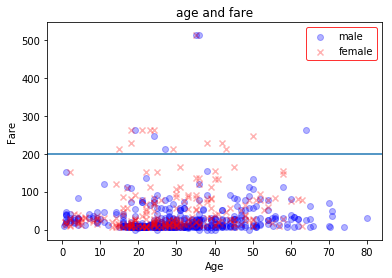

In [24]:
# scatter 그래프

plt.figure()
# plt.grid('on')
plt.title('age and fare')
flagman=df_train['Sex']=='male'
plt.scatter( df_train.loc[flagman]['Age'], df_train.loc[flagman]['Fare'], c='blue', alpha=0.3, label='male')
flagfemale = ~flagman
plt.scatter( df_train.loc[flagfemale]['Age'], df_train.loc[flagfemale]['Fare'], marker='x', c='red', alpha=0.3, label='female')
plt.axhline(y=200)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(edgecolor='red')  # 비고박스(legend) 외곽라인 색 지정 가능 
plt.show()
plt.close()

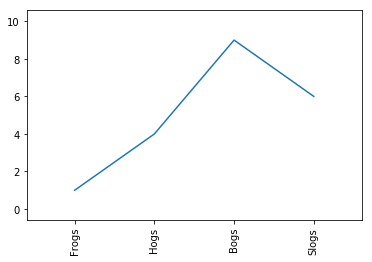

In [25]:
# plot . x 라벨 지정 및  회전 
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']
plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()
plt.close()

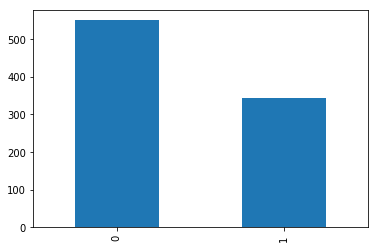

In [26]:
# 개수 분포, 그래프
df_train['Survived'].value_counts().plot.bar()

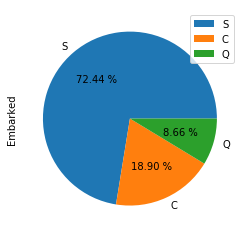

In [27]:
# 카테고리 분포 
df_train['Embarked'].value_counts().plot.pie(autopct='%.2f %%')
plt.legend()

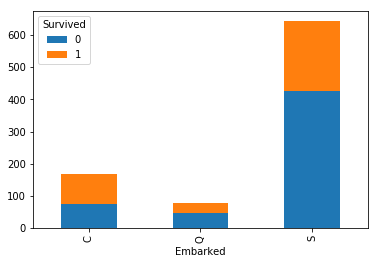

In [28]:
# 카테고리 분포. 그룹별. stack bar
dfembarkedsurv = df_train.groupby(['Embarked', 'Survived'])['Survived'].count().unstack('Survived').fillna(0)
dfembarkedsurv.plot(kind='bar', stacked=True)

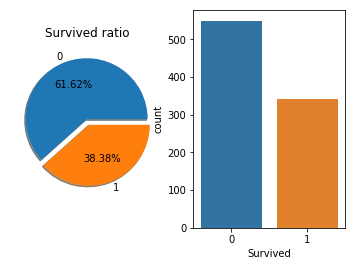

In [29]:
# 여러 그래프를 한 번에 그리기.
# 두 가지 방법이 있다.
# plt.subplots 와 plt.subplot 
#  subplots는 리턴받아 사용. subplot은 리턴값 안받고 그때그때 사용.
# 
# ex) subplot(행,열, 현재번호)
# plt.subplot(1,2,1)
# plot...
# plt.subplot(1,2,2)
# plot...
# ex) f,ax = subplots(행,열)
# plots... by ax[인덱스번호]
# 
# 생존자 비율
# plt.figure()
f, ax = plt.subplots(1,2)

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived ratio')
ax[0].set_ylabel('')

# Survived 컬럼 카운트 (dataframe plot보다 이쁨)
sns.countplot('Survived', data=df_train, ax=ax[1])

[549 342]


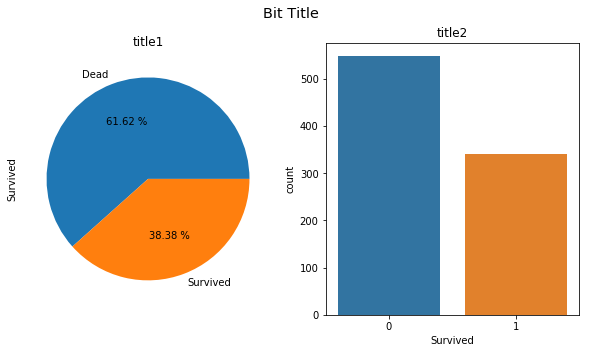

In [30]:
# 위와 같은 그림을 다른 방식으로
plt.figure(figsize=(2*5,5))
plt.suptitle('Bit Title', fontsize='x-large')

plt.subplot(1,2,1)
plt.title('title1')
xs = df_train['Survived'].value_counts()
print(xs.values)
df_train['Survived'].value_counts().plot.pie(autopct='%.2f %%', labels=['Dead', 'Survived'])  #autopct='%.2f %%'

plt.subplot(1,2,2)
plt.title('title2')
sns.countplot('Survived', data=df_train)

plt.show()

In [31]:
# 가로축에 값이 많은 경우, 글씨가 안보임. 글씨 회전
import random
# 랜덤 스트링 분포도
rs=[]
rs2=[]
for i in range(1000):
    c = chr(np.random.randint(0, 26)+ord('A'))  # 주의! random.randint(0,26) 이 아니다. np.random.randint와 사용방식이 다름!
    rs.append(c)
    c = chr(random.randint(0, 25)+ord('A'))  # random.randint는 마지막값이 범위에 포함된다!!! 
    rs2.append(c)
# print(rs)
# print(rs2)

from collections import Counter

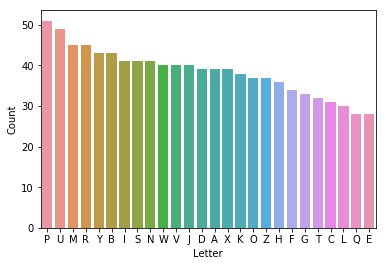

In [32]:
counter1 = Counter(rs)
dfc1 = pd.DataFrame([ [x1,x2] for x1,x2 in counter1.items() ], columns=['Letter', 'Count'])
dfc1 = dfc1.sort_values('Count', ascending=False)

plt.figure()
# sns.barplot(dfc1['Letter'], dfc1['Count'], color='blue', label='LetterCount')
sns.barplot(dfc1['Letter'], dfc1['Count'], label='LetterCount') # 색상이 없으면 무지개색 
plt.show()

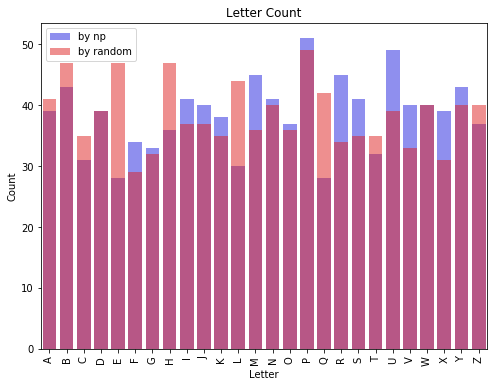

In [33]:
# x 축을 일치시키고 y값 비교하기 / x축 회전 rotation

dfc1 = dfc1.sort_values('Letter', ascending=True)

counter2 = Counter(rs2)
dfc2 = pd.DataFrame([ [x1,x2] for x1,x2 in counter2.items() ], columns=['Letter', 'Count'])
dfc2 = dfc2.sort_values('Letter', ascending=True)
xvalue = dfc1['Letter']

plt.figure(figsize=(8, 6))
plt.title('Letter Count')
plt.xticks(rotation=90)   # x 라벨 회전. (글자가 겹칠때 유용함)
sns.barplot(xvalue, dfc1['Count'], color='blue', alpha=0.5, label='by np')
sns.barplot(xvalue, dfc2['Count'], color='red', alpha=0.5, label='by random')
plt.legend()
plt.show()
    

---
### 그룹별 카운팅

- dataframe.groupby()  : array로 여러개 가능
- sns.countplot() : hue
- dataframe.crosstab() : 표생성. 세로필드, 가로필드.  (세로필드를 array로 어러개 가능)
- sns.factorplot(x,y,hue) : y평균값 그래프. hue로 지정된 필드의 종류만큼 라인이 그려짐.
- sns.violinplot(x,y,hue) : y값의 범위와 분포를 알 수 있는 그래프. 

In [34]:
# 성별과 생존 관계
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

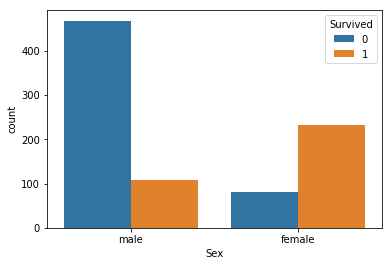

In [35]:
sns.countplot('Sex', hue='Survived', data=df_train)

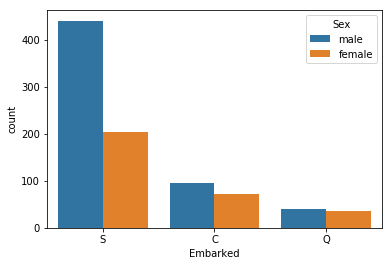

In [36]:
sns.countplot('Embarked', hue='Sex', data=df_train)

In [37]:
pltconfig_check()

interactive False True
figure.facecolor white (1, 1, 1, 0)
figure.dpi 100.0 72.0
figure.figsize [6.4, 4.8] [6.0, 4.0]
figure.subplot.bottom 0.11 0.125
figure.edgecolor white (1, 1, 1, 0)


In [38]:
# 두 개의 기준으로 groupby한 카운팅
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [39]:
## 피클래스와 생존 관계
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


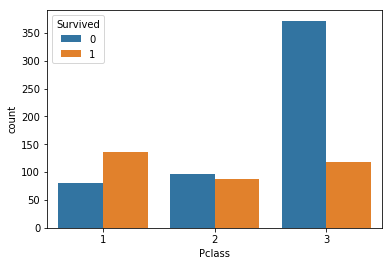

In [40]:
sns.countplot('Pclass', hue='Survived', data=df_train)

In [41]:
## 성별과 피클래스에 따른 생존
pd.crosstab([df_train.Sex, df_train.Pclass], df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

In [42]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

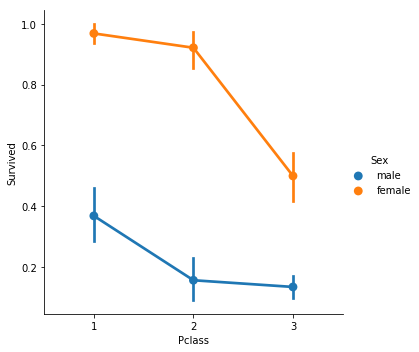

In [43]:
## 평균 꺽은선 그래프
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

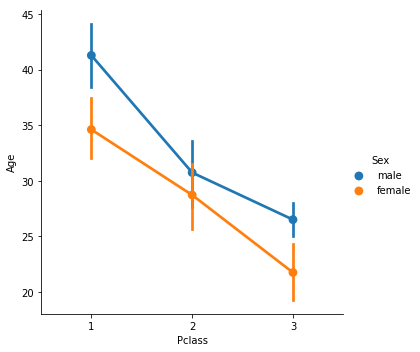

In [44]:
sns.factorplot('Pclass', 'Age', hue='Sex', data=df_train)

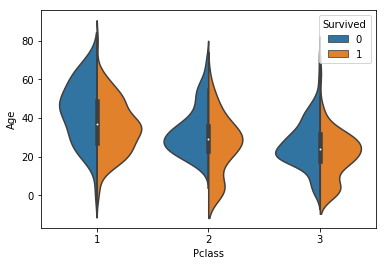

In [45]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True)

In [46]:
pltconfig_check()

interactive False True
figure.facecolor white (1, 1, 1, 0)
figure.dpi 100.0 72.0
figure.figsize [6.4, 4.8] [6.0, 4.0]
figure.subplot.bottom 0.11 0.125
figure.edgecolor white (1, 1, 1, 0)


---
### 히스토그램
- dataframe.plot.hist(bins=count, color='blue')
- sns.FaceGrid(data, hue), map, plt.hist : hue를 주면 hue로 지정된 필드의 종류별로 겹침. 

In [47]:
# df_train['Age'].value_counts()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


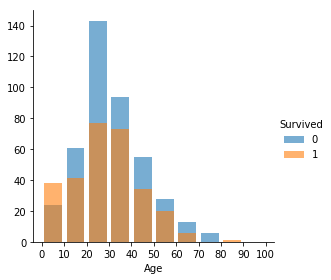

In [48]:
# 히스토그램. 두 개 비교.

# 연령대별 생존자 수, 사망자 수 2개 그래프 겹침 
grid = sns.FacetGrid(df_train, hue='Survived', size=4)
# bins는 개수로 지정할 수 도 있지만, 구간을 입력할 수도 있다.
grid.map(plt.hist, 'Age', alpha=.6, rwidth=0.8, bins=[0,10,20,30,40,50,60,70,80,90,100])
# bins 구간에 맞추어 x tick을 지정해 준다.
xlist=list(range(0, 110, 10))
print(xlist)
plt.xticks(xlist)
grid.add_legend()

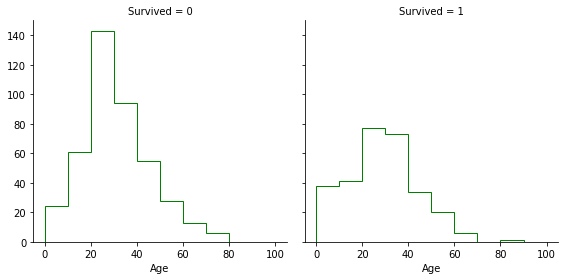

In [49]:
# 위 히스토그램을 각각 그리기
grid = sns.FacetGrid(df_train, col='Survived', size=4, margin_titles=True)
grid.map(plt.hist, 'Age', bins=[0,10,20,30,40,50,60,70,80,90,100], color='green', histtype='step') # histtype 생략시(default='bar') 색칠한 일반 모양
# title을 value로 지정
# grid.set_titles(row_template='{row_name}', col_template='{col_name}')  # 이것을 생략하면 제목은 알아서 column=value가 된다. 

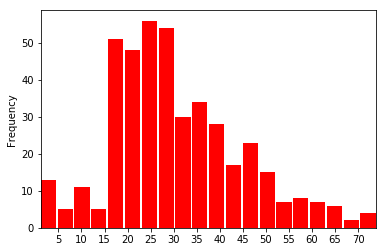

In [50]:
# 히스토그램. 
df_train[ df_train['Survived']==0 ].Age.plot.hist(bins=20, color='red', rwidth=0.9)  
# rwidth (0~1)범위로 가로크기 비율을 정해 여백을 줄 수 있다.
xlist = list(range(0, 85, 5))
plt.xticks(xlist)
plt.margins(x=0)  # 안쪽 x 마진 제거
plt.show()

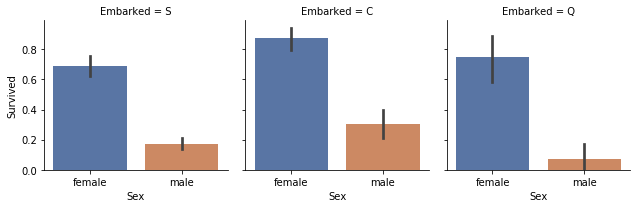

In [51]:
# FacetGrid로 가로로 여러 그래프 그리기(그룹/컬럼별)
grid = sns.FacetGrid(df_train, col='Embarked', size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', palette='deep', order=['female','male'])  
# order가 없으면 male, female 순으로 나온다. 

---
## 상관계수

In [52]:
# Dataframe 상관계수 테이블 correlation 
df_num.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000


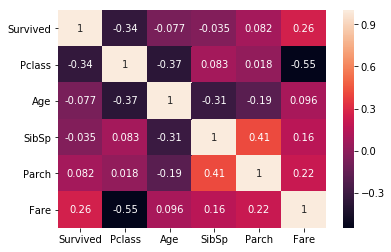

In [53]:
# 상관계수 히트맵 
sns.heatmap( df_train.drop('PassengerId', axis=1).corr(), annot=True)

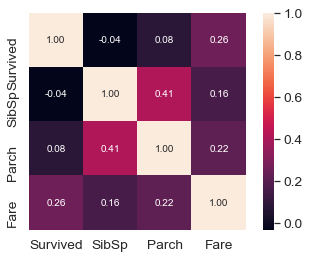

In [54]:
cols = ['Survived', 'SibSp', 'Parch', 'Fare']
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
  fmt='.2f', annot_kws={'size':10} , yticklabels=cols, xticklabels=cols)


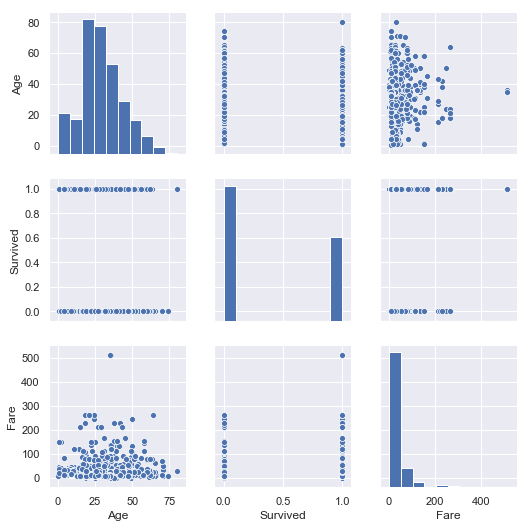

In [55]:
# 컬럼별 2차원 데이터 분포도. scatter, histogram.
sns.set()
cols=['Age', 'Survived', 'Fare']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

In [56]:
pltconfig_check()

font.size 10.0 12.0
ytick.labelsize medium 11.0
ytick.left True False
xtick.bottom True False
axes.labelcolor black .15
lines.solid_capstyle projecting round
ytick.minor.size 2.0 4.0
ytick.major.width 0.8 1.25
text.color black .15
ytick.minor.width 0.6 1.0
xtick.major.size 3.5 6.0
image.cmap viridis rocket
xtick.minor.size 2.0 4.0
interactive False True
axes.prop_cycle cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490

---
## Evaluation
- confusion_matrix( real, predict ) : real vs predict 결과 비교. 대각선이 많을수록 맞춘것임.

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_real=[]
y_predict=[]
for i in range(1000):
    v = np.random.randint(0, 10)
    y_real.append(v)
    if np.random.rand()<0.8:
        y_predict.append( np.random.randint(0, 10))
    else:
        y_predict.append(v)
cm = confusion_matrix(y_real, y_predict)  # row=real, column=predict
cm

array([[34, 10, 11, 10,  8,  3, 11,  7, 10, 11],
       [ 6, 30,  9,  5,  2,  3,  7,  5,  7,  8],
       [ 5,  9, 27,  5,  9, 10,  8,  4,  5,  7],
       [12, 11, 12, 28, 11,  7, 12,  5, 12,  8],
       [12,  8, 10,  6, 33,  5,  6,  5,  4, 13],
       [ 9,  6, 11,  7,  3, 34,  9,  7,  7, 14],
       [ 7, 10, 12,  7,  9,  6, 20,  9, 12,  8],
       [ 6, 16,  5,  5,  7,  7,  9, 24,  8,  6],
       [ 9,  5,  7, 11,  7,  8,  2,  5, 30, 11],
       [ 6,  7, 10, 11,  5, 11, 12,  7,  7, 23]], dtype=int64)

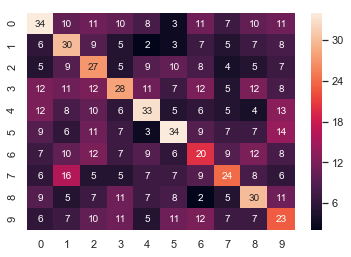

In [59]:
# draw confusion matrix with seaborn
df_cm = pd.DataFrame(cm, index=range(10),
                  columns=range(10))
# plt.figure(figsize = (10,7))
# sns.set(font_scale=1.4)  # for label size. 변경시 다른 plot도 전부 영향을 받음.
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10})  # font size
# sns.set(font_scale=1.0) # back to the default font size.... 
# 설정 변경시 이후 다른 plot 환경 변화로 문제가 발생.

In [60]:
pltconfig_check()

font.size 10.0 12.0
ytick.labelsize medium 11.0
ytick.left True False
xtick.bottom True False
axes.labelcolor black .15
lines.solid_capstyle projecting round
ytick.minor.size 2.0 4.0
ytick.major.width 0.8 1.25
text.color black .15
ytick.minor.width 0.6 1.0
xtick.major.size 3.5 6.0
image.cmap viridis rocket
xtick.minor.size 2.0 4.0
interactive False True
axes.prop_cycle cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490

In [61]:
pltconfig_default()
pltconfig_check()

interactive False True
figure.facecolor white (1, 1, 1, 0)
figure.dpi 100.0 72.0
figure.figsize [6.4, 4.8] [6.0, 4.0]
figure.subplot.bottom 0.11 0.125
figure.edgecolor white (1, 1, 1, 0)


In [62]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.grid('off')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


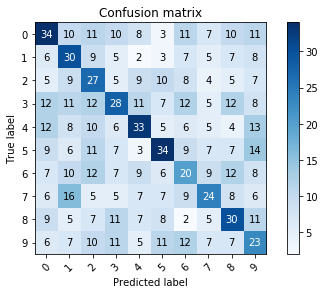

In [63]:
plot_confusion_matrix(cm, classes=range(10))
plt.show()
plt.close()

In [64]:
pltconfig_check()

interactive False True
figure.facecolor white (1, 1, 1, 0)
figure.dpi 100.0 72.0
figure.figsize [6.4, 4.8] [6.0, 4.0]
figure.subplot.bottom 0.11 0.125
figure.edgecolor white (1, 1, 1, 0)
